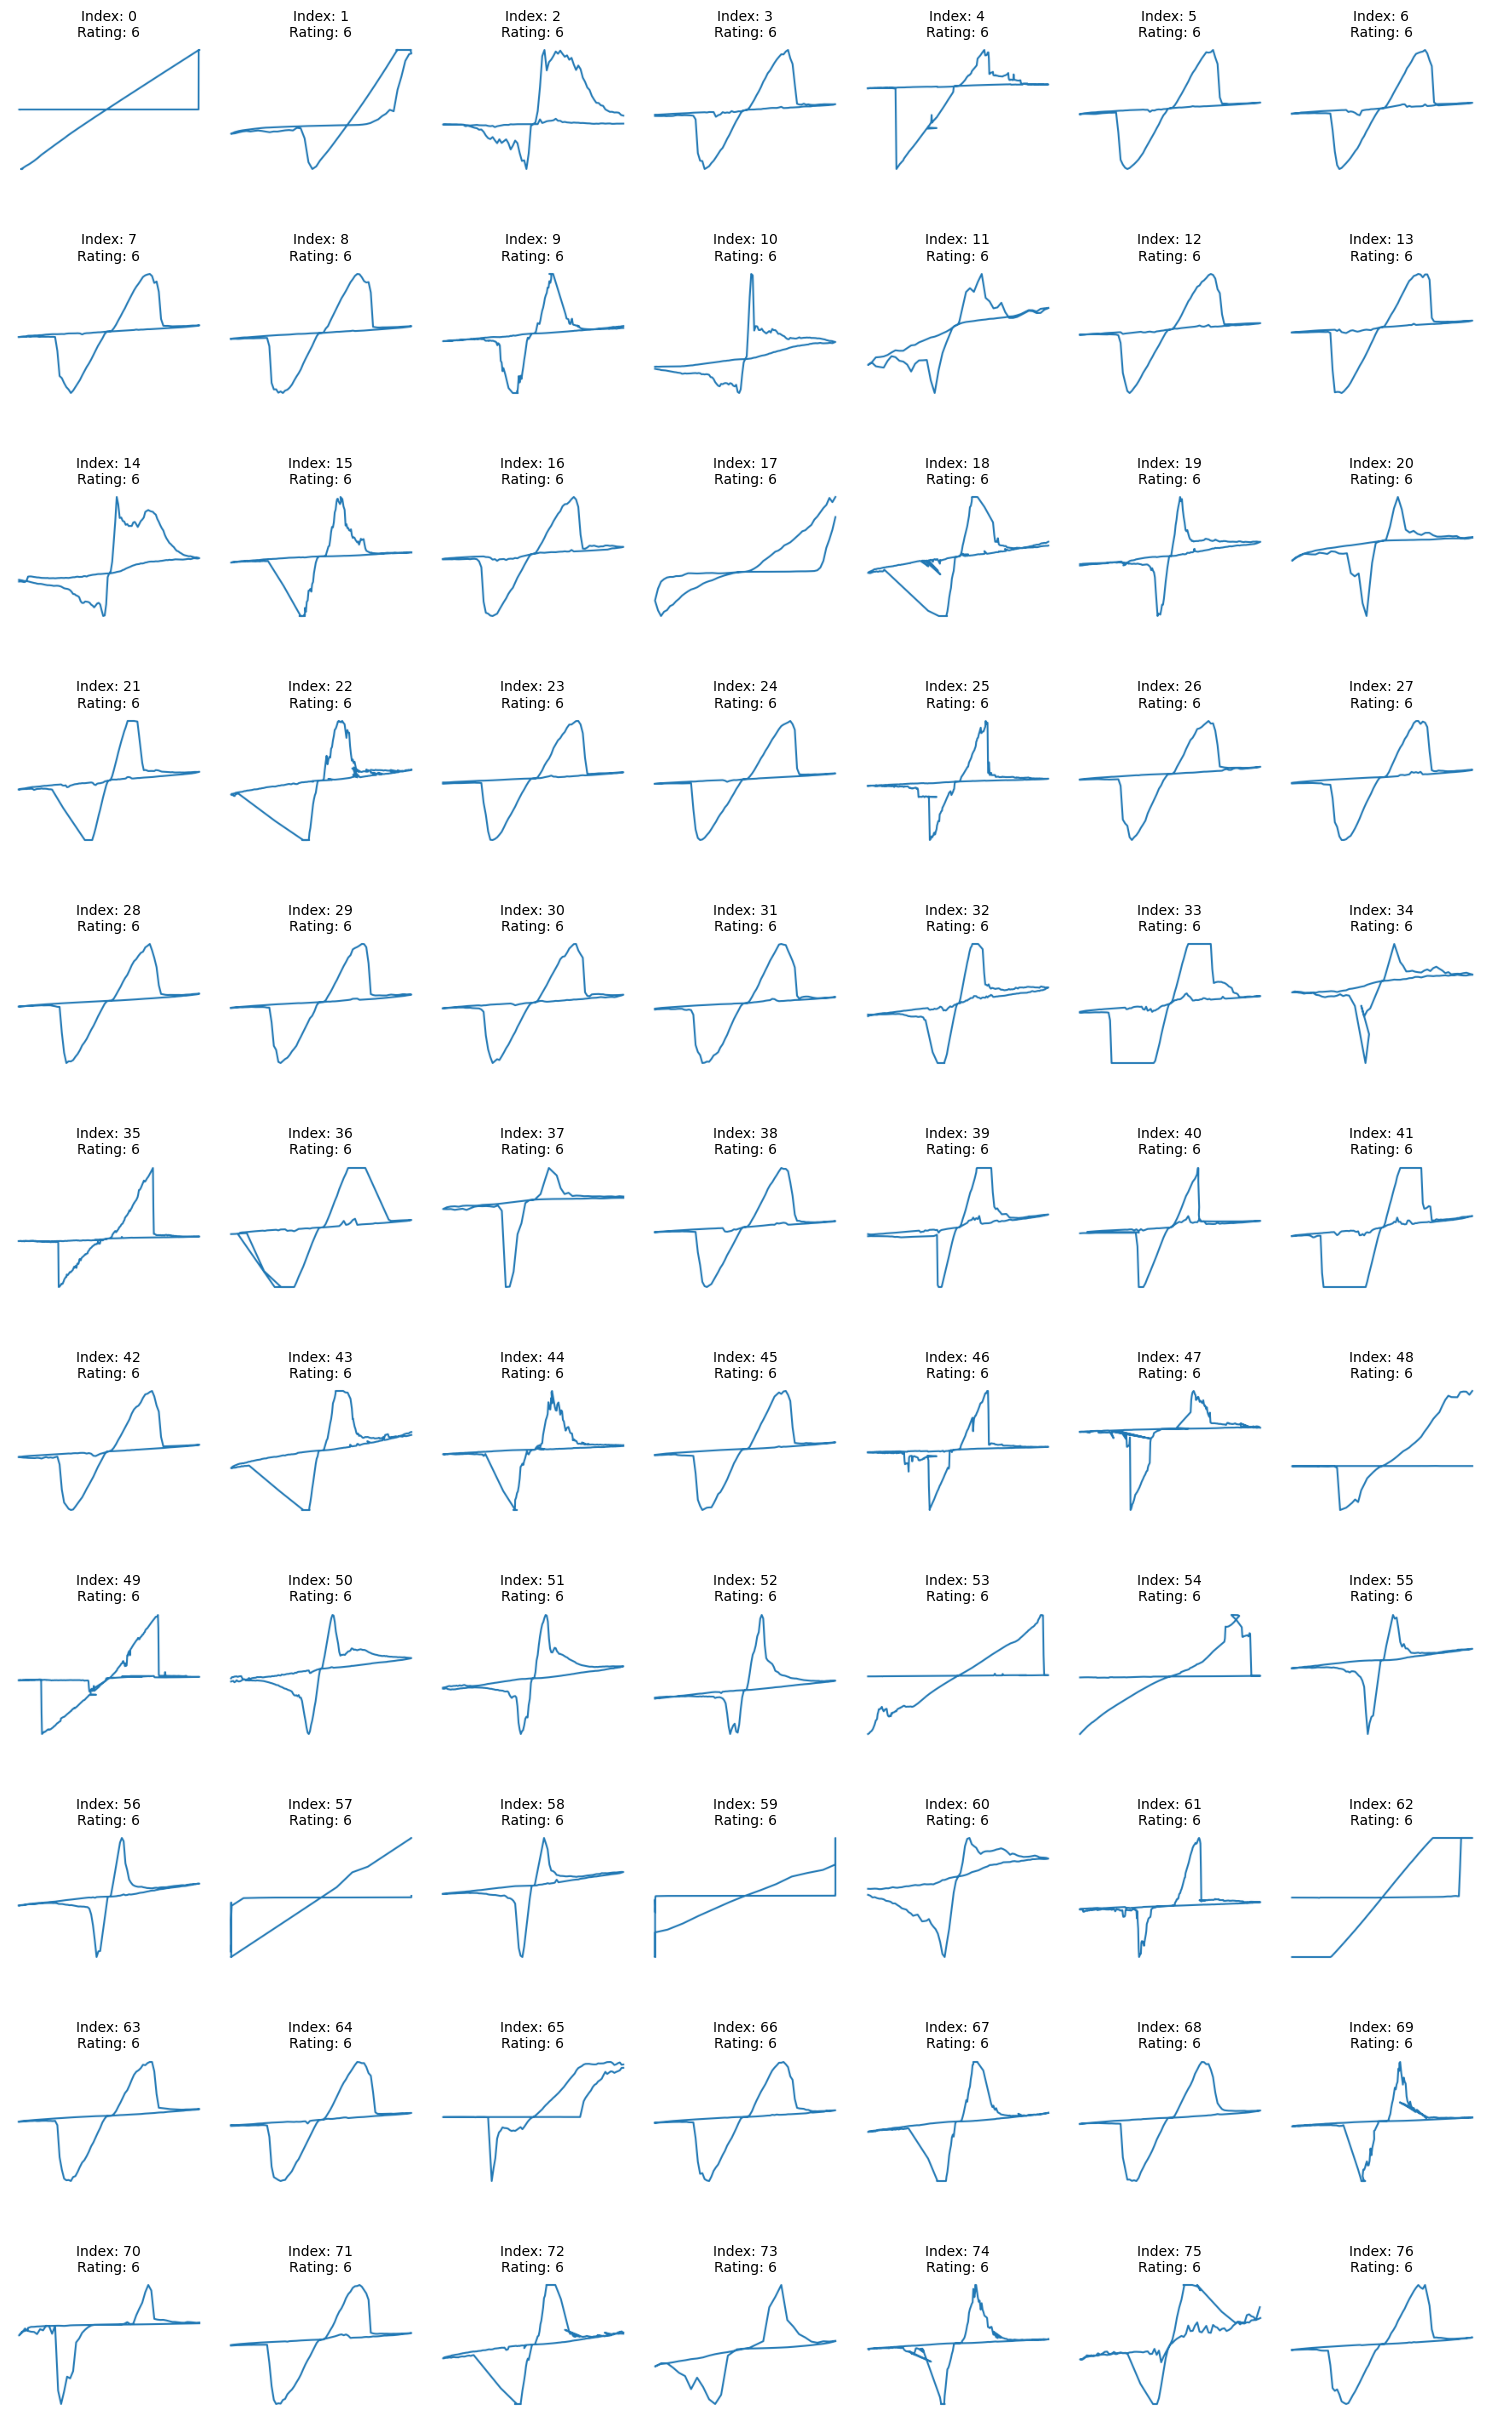

KeyboardInterrupt: 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import base64
from io import BytesIO
from PIL import Image

def decode_image(encoded_image):
    image_data = base64.b64decode(encoded_image)
    image = Image.open(BytesIO(image_data))
    return image

def plot_images_in_batches(df, batch_size=77):  
    df_sorted = df.sort_values(by='Rating', ascending=False)

    num_images = len(df_sorted)
    num_batches = (num_images + batch_size - 1) // batch_size

    for batch in range(num_batches):
        start_index = batch * batch_size
        end_index = min(start_index + batch_size, num_images)
        plot_images(df_sorted[start_index:end_index], start_index, batch_size)

def plot_images(df_subset, start_index, batch_size):
    num_images = len(df_subset)
    num_columns = 7   
    num_rows = 11     

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 25))  # Adjusted figure size
    axes = axes.flatten()

    for i, (_, row) in enumerate(df_subset.iterrows()):
        if pd.notna(row['IV Image']):
            image = decode_image(row['IV Image'])
            axes[i].imshow(image)
            rating = row.get('Rating', 'N/A')  # Get the rating, default to 'N/A' if not available
            axes[i].set_title(f"Index: {start_index + i}\nRating: {rating}", fontsize=10)
            axes[i].axis('off')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

csv_file_path = 'memristive.csv'
df = pd.read_csv(csv_file_path)
plot_images_in_batches(df)


Multiclass

In [20]:
import base64
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

def decode_image_from_base64(base64_string):
    img_data = base64.b64decode(base64_string)
    img = tf.io.decode_image(img_data, channels=1)  # Assuming grayscale images
    return img.numpy()
dataset_df=df
X = np.array([decode_image_from_base64(img) for img in dataset_df['IV Image']])
y = dataset_df['Rating'].values


X = X / 255.0

y = y - 1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=150, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

Epoch 1/20
10/10 [==============================] - 19s 2s/step - loss: 3.9799 - accuracy: 0.3018 - val_loss: 1.5354 - val_accuracy: 0.4915
Epoch 2/20
10/10 [==============================] - 17s 2s/step - loss: 1.5654 - accuracy: 0.4332 - val_loss: 1.5244 - val_accuracy: 0.4915
Epoch 3/20
10/10 [==============================] - 18s 2s/step - loss: 1.5120 - accuracy: 0.4629 - val_loss: 1.4841 - val_accuracy: 0.4915
Epoch 4/20
10/10 [==============================] - 17s 2s/step - loss: 1.4865 - accuracy: 0.4466 - val_loss: 1.4304 - val_accuracy: 0.4915
Epoch 5/20
10/10 [==============================] - 17s 2s/step - loss: 1.4529 - accuracy: 0.4523 - val_loss: 1.3470 - val_accuracy: 0.4915
Epoch 6/20
10/10 [==============================] - 17s 2s/step - loss: 1.3085 - accuracy: 0.5011 - val_loss: 1.1936 - val_accuracy: 0.5706
Epoch 7/20
10/10 [==============================] - 17s 2s/step - loss: 1.1676 - accuracy: 0.5724 - val_loss: 1.0253 - val_accuracy: 0.6186
Epoch 8/20
10/10 [==

In [34]:
dataset_df

,Rating,IV Image,Binary Rating
0,4,iVBORw0KGgoAAAANSUhEUgAAAOgAAACaCAYAAACjQwSyAA...,0
1,4,iVBORw0KGgoAAAANSUhEUgAAAOgAAACaCAYAAACjQwSyAA...,0
2,0,iVBORw0KGgoAAAANSUhEUgAAAOgAAACaCAYAAACjQwSyAA...,0
3,3,iVBORw0KGgoAAAANSUhEUgAAAOgAAACaCAYAAACjQwSyAA...,0
4,3,iVBORw0KGgoAAAANSUhEUgAAAOgAAACaCAYAAACjQwSyAA...,0
...,...,...,...
2711,4,iVBORw0KGgoAAAANSUhEUgAAAOgAAACaCAYAAACjQwSyAA...,1
2712,2,iVBORw0KGgoAAAANSUhEUgAAAOgAAACaCAYAAACjQwSyAA...,0
2713,4,iVBORw0KGgoAAAANSUhEUgAAAOgAAACaCAYAAACjQwSyAA...,1
2714,0,iVBORw0KGgoAAAANSUhEUgAAAOgAAACaCAYAAACjQwSyAA...,0


Binary Classifier

In [37]:
import base64
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


def decode_image_from_base64(base64_string):
    img_data = base64.b64decode(base64_string)
    img = tf.io.decode_image(img_data, channels=1)  
    return img.numpy()

X = np.array([decode_image_from_base64(img) for img in dataset_df['IV Image']])
y = dataset_df['Binary Rating'].values  


X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=150, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

Epoch 1/20
15/15 [==============================] - 29s 2s/step - loss: 1.9012 - accuracy: 0.7693 - val_loss: 0.4600 - val_accuracy: 0.8272
Epoch 2/20
15/15 [==============================] - 28s 2s/step - loss: 0.4450 - accuracy: 0.8278 - val_loss: 0.4117 - val_accuracy: 0.8272
Epoch 3/20
15/15 [==============================] - 25s 2s/step - loss: 0.3675 - accuracy: 0.8356 - val_loss: 0.3100 - val_accuracy: 0.8713
Epoch 4/20
15/15 [==============================] - 26s 2s/step - loss: 0.3107 - accuracy: 0.8674 - val_loss: 0.2689 - val_accuracy: 0.9044
Epoch 5/20
15/15 [==============================] - 25s 2s/step - loss: 0.2905 - accuracy: 0.8877 - val_loss: 0.2569 - val_accuracy: 0.9062
Epoch 6/20
15/15 [==============================] - 25s 2s/step - loss: 0.2787 - accuracy: 0.9029 - val_loss: 0.2599 - val_accuracy: 0.9007
Epoch 7/20
15/15 [==============================] - 26s 2s/step - loss: 0.2643 - accuracy: 0.8890 - val_loss: 0.2431 - val_accuracy: 0.9118
Epoch 8/20
15/15 [==